In [207]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [208]:
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [209]:
iris.keys

<function Bunch.keys>

In [210]:
iris_features = iris.feature_names
df_data = pd.DataFrame( data = iris.data, columns = iris_features)
df_labels = pd.DataFrame(data = iris.target, columns = ['labels'])

In [211]:
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [212]:
df_labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [213]:
data = pd.concat([df_data, df_labels], axis=1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0.5, 1.0, 'Label')

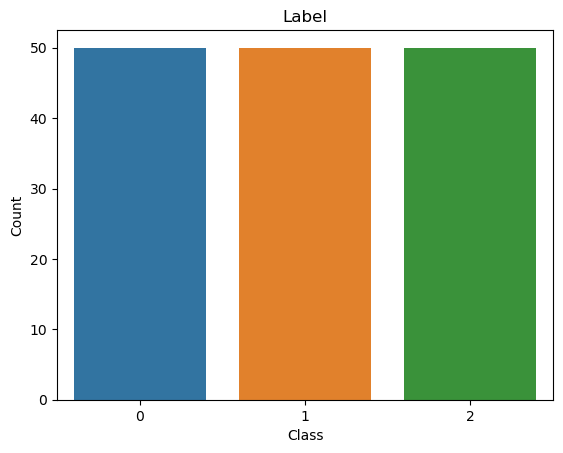

In [214]:
sns.countplot(data = data, x="labels")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

In [215]:
data['labels'].value_counts()

0    50
1    50
2    50
Name: labels, dtype: int64

In [216]:
y = data['labels']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int32

In [217]:
X=data.drop('labels',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [218]:
type(X)

pandas.core.frame.DataFrame

In [219]:
X = X.to_numpy()

In [220]:
type(X)

numpy.ndarray

In [221]:
y = y.to_numpy()

In [222]:
type(y)

numpy.ndarray

In [223]:
X.shape

(150, 4)

In [224]:
y.shape

(150,)

In [225]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [226]:
X.shape

(150, 4, 1)

In [227]:
y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [228]:
n_steps = X.shape[1]
n_steps

4

In [229]:
X

array([[[5.1],
        [3.5],
        [1.4],
        [0.2]],

       [[4.9],
        [3. ],
        [1.4],
        [0.2]],

       [[4.7],
        [3.2],
        [1.3],
        [0.2]],

       [[4.6],
        [3.1],
        [1.5],
        [0.2]],

       [[5. ],
        [3.6],
        [1.4],
        [0.2]],

       [[5.4],
        [3.9],
        [1.7],
        [0.4]],

       [[4.6],
        [3.4],
        [1.4],
        [0.3]],

       [[5. ],
        [3.4],
        [1.5],
        [0.2]],

       [[4.4],
        [2.9],
        [1.4],
        [0.2]],

       [[4.9],
        [3.1],
        [1.5],
        [0.1]],

       [[5.4],
        [3.7],
        [1.5],
        [0.2]],

       [[4.8],
        [3.4],
        [1.6],
        [0.2]],

       [[4.8],
        [3. ],
        [1.4],
        [0.1]],

       [[4.3],
        [3. ],
        [1.1],
        [0.1]],

       [[5.8],
        [4. ],
        [1.2],
        [0.2]],

       [[5.7],
        [4.4],
        [1.5],
        [0.4]],

       [

In [230]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [231]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [232]:
model =Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

print("input_shape => ", n_steps, n_features)
model.summary()   

input_shape =>  4 1
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 3, 64)             192       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 50)                3250      
                                                                 
 dense_22 (Dense)            (None, 70)                3570      
                                                                 
 dense_23 (Dense)            (None, 3)                 213       
                                  

c:\new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [233]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=16,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
8/8 [==============================] - 1s 66ms/step - loss: 1.1134 - accuracy: 0.3917 - val_loss: 1.2531 - val_accuracy: 0.2000
Epoch 2/100
8/8 [==============================] - 0s 40ms/step - loss: 0.9768 - accuracy: 0.5250 - val_loss: 0.8923 - val_accuracy: 0.5667
Epoch 3/100
8/8 [==============================] - 0s 32ms/step - loss: 0.8086 - accuracy: 0.5750 - val_loss: 0.6661 - val_accuracy: 0.5667
Epoch 4/100
8/8 [==============================] - 0s 34ms/step - loss: 0.4822 - accuracy: 0.7583 - val_loss: 0.3731 - val_accuracy: 0.8000
Epoch 5/100
8/8 [==============================] - 0s 27ms/step - loss: 0.3342 - accuracy: 0.8750 - val_loss: 0.3166 - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 0s 36ms/step - loss: 0.2494 - accuracy: 0.9167 - val_loss: 0.1687 - val_accuracy: 0.9667
Epoch 7/100
8/8 [==============================] - 0s 39ms/step - loss: 0.2548 - accuracy: 0.8833 - val_loss: 0.2539 - val_accuracy: 0.8667
Epoch 8/100
8/8 [===

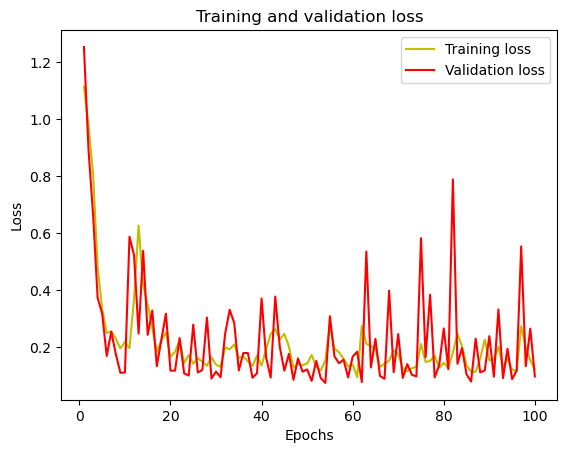

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

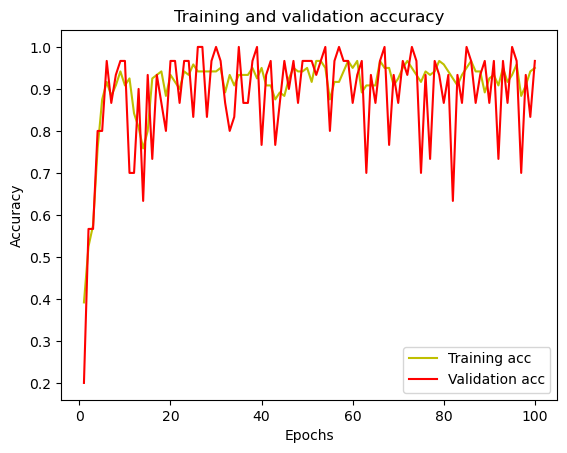

In [235]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [236]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
